In [1]:
import numpy as np
from PIL import Image
from glob import glob
import cv2
import matplotlib.pyplot as plt


In [2]:
mask_list=glob('../../data/segmentationDDH/predict/DeepLabV3Plus/GT/**/')
pred_DeepLabV3Plus_list=glob('../../data/segmentationDDH/predict/DeepLabV3Plus/pred/**/')
pred_NestedUNet_list=glob('../../data/segmentationDDH/predict/NestedUNet/pred/**/')
pred_PAN_list=glob('../../data/segmentationDDH/predict/PAN/pred/**/')
pred_UNet_list=glob('../../data/segmentationDDH/predict/UNet/pred/**/')

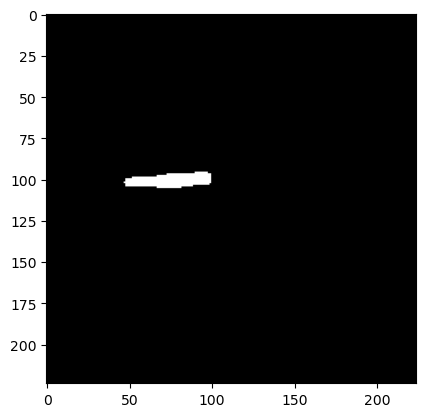

In [35]:
# Load the binary image (replace 'your_binary_image.png' with your actual image file)
image_path = mask_list[300]+'2.png'
binary_image = Image.open(image_path)

plt.imshow(binary_image,cmap='gray')
plt.show()


In [37]:
# Convert the binary image to a numpy array
binary_array = np.array(binary_image)

# Calculate the covariance matrix
cov_matrix = np.cov(binary_array)

# Find the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvectors based on eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Retrieve the eigenvectors corresponding to the largest eigenvalues
largest_eigenvectors = sorted_eigenvectors[:, :2]  # Change the number 2 to the desired number of eigenvectors

# Print the eigenvectors
largest_eigenvectors.shape


(224, 2)

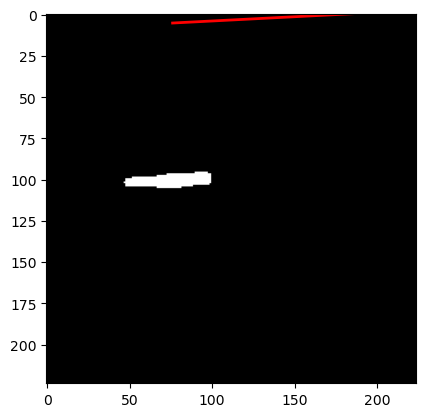

In [25]:
# Define the coefficients of the vector equation
c = 0
# Calculate the x and y values for the vector
x = np.linspace(pca.mean_[1], binary_image.shape[1], 2)
y = (c-pca.mean_[0] - a*(x-pca.mean_[1])) / b

# Plot the binary image
plt.imshow(binary_image, cmap='gray')

# Plot the vector on the binary image
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=0.1, color='red')

plt.show()


In [30]:
y[1:]-y[:-1]

array([-7.68426307])